# 1. Load Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/Answers.csv
input/Questions.csv
input/Tags.csv
input/2009.csv
input/2010.csv
input/2011.csv
input/2017-07_bme280sof.csv
input/2017-07_sds011sof.csv
input/2017-08_bme280sof.csv
input/2017-08_sds011sof.csv
input/2017-09_bme280sof.csv
input/2017-09_sds011sof.csv
input/2017-10_bme280sof.csv
input/2017-10_sds011sof.csv
input/2017-11_bme280sof.csv
input/2017-11_sds011sof.csv
input/2017-12_bme280sof.csv
input/2017-12_sds011sof.csv
input/2018-01_bme280sof.csv
input/2018-01_sds011sof.csv
input/2018-02_bme280sof.csv
input/2018-02_sds011sof.csv
input/2018-03_bme280sof.csv
input/2018-03_sds011sof.csv
input/2018-04_bme280sof.csv
input/2018-04_sds011sof.csv
input/2018-05_bme280sof.csv
input/2018-05_sds011sof.csv
input/2018-06_bme280sof.csv
input/2018-06_sds011sof.csv
input/2018-07_bme280sof.csv
input/2018-07_sds011sof.csv
input/2018-08_bme280sof.csv
input/2018-08_sds011sof.csv
input/2018-09_bme280sof.csv
input/2018-09_sds011sof.csv
input/2018-10_bme280sof.csv
input/2018-10_sds011sof.csv
input/

In [2]:
answers_data = pd.read_csv('input/Answers.csv', encoding = "ISO-8859-1")
questions_data = pd.read_csv('input/Questions.csv', encoding = "ISO-8859-1")
tags_data = pd.read_csv('input/Tags.csv', encoding = "ISO-8859-1")

In [3]:
print(answers_data.shape)
answers_data.head()

(2014516, 6)


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [4]:
print(questions_data.shape)
questions_data.head()

(1264216, 7)


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [5]:
print(tags_data.shape)
tags_data.head()

(3750994, 2)


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [6]:
answers_data.ParentId.unique().shape[0]

1102568

In [7]:
questions_data.Id.unique().shape[0]

1264216

In [8]:
tags_data.Id.unique().shape[0]

1264216

In [9]:
len(tags_data.Tag.unique())

37035

In [10]:
a = tags_data.Id.unique()-questions_data.Id.unique()
np.count_nonzero(a)

0

In [11]:
b = questions_data.Id.unique()
c = answers_data.ParentId.unique()
questions_ids_with_no_answer = b[~np.in1d(b,c)]
questions_ids_with_no_answer.shape[0]

161648

In [12]:
mask_questions = questions_data["Id"].isin(questions_ids_with_no_answer)
questions_data = questions_data.loc[~mask_questions]

In [13]:
mask_tags = tags_data["Id"].isin(questions_ids_with_no_answer)
tags_data = tags_data.loc[~mask_tags]

In [14]:
questions_data.isnull().sum()

Id                    0
OwnerUserId       13924
CreationDate          0
ClosedDate      1055196
Score                 0
Title                 0
Body                  0
dtype: int64

In [15]:
answers_data.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [16]:
tags_data.isnull().sum()

Id        0
Tag    1029
dtype: int64

In [17]:
tags_data = tags_data.dropna(axis=0)

In [18]:
print(questions_data.shape)
print(answers_data.shape)
print(tags_data.shape)

(1102568, 7)
(2014516, 6)
(3256145, 2)


# 2. Data Visualisation

## 2.1. Tags data grouped by tags name

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
tags=tags_data.Tag.value_counts().rename_axis('Tag').reset_index(name='counts')

In [21]:
tags.head()

,Tag,counts
0,javascript,108637
1,java,100781
2,c#,90035
3,php,87354
4,android,74596


In [22]:
tags = tags.loc[tags['counts']>100]

In [23]:
print(tags.shape)
tags.head()

(3028, 2)


,Tag,counts
0,javascript,108637
1,java,100781
2,c#,90035
3,php,87354
4,android,74596


Text(0, 0.5, 'Number of questions')

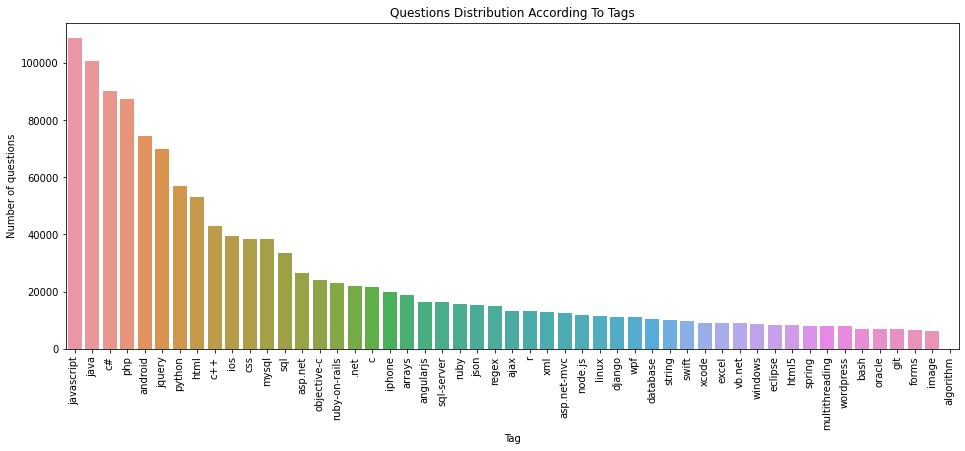

In [24]:
plt.figure(figsize=(16,6))

plt.title("Questions Distribution According To Tags")
sns.barplot(x=tags.loc[:50].Tag, y=tags[:50].counts)

plt.xticks(rotation=90)
plt.ylabel("Number of questions")

In [25]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 3027
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     3028 non-null   object
 1   counts  3028 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 135.5+ KB


In [26]:
tags.describe()

,counts
count,3028.00000
mean,945.03996
std,4768.87636
min,101.00000
25%,144.00000
50%,237.50000
75%,525.25000
max,108637.00000


## 2.2. Tags data grouped by questions

In [27]:
questions_tags = tags_data.Id.value_counts().rename_axis('Id').reset_index(name='counts')

In [28]:
questions_tags.shape

(1102566, 2)

In [29]:
questions_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102566 entries, 0 to 1102565
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Id      1102566 non-null  int64
 1   counts  1102566 non-null  int64
dtypes: int64(2)
memory usage: 16.8 MB


In [30]:
questions_tags.describe()

,Id,counts
count,1.102566e+06,1.102566e+06
mean,2.022391e+07,2.953243e+00
std,1.137302e+07,1.204112e+00
min,8.000000e+01,1.000000e+00
25%,1.039486e+07,2.000000e+00
50%,2.015798e+07,3.000000e+00
75%,3.005732e+07,4.000000e+00
max,4.014319e+07,5.000000e+00


In [31]:
questions_tags.head()

,Id,counts
0,14365520,5
1,35443910,5
2,27855420,5
3,35444130,5
4,7925050,5


Text(0, 0.5, 'Number of tags')

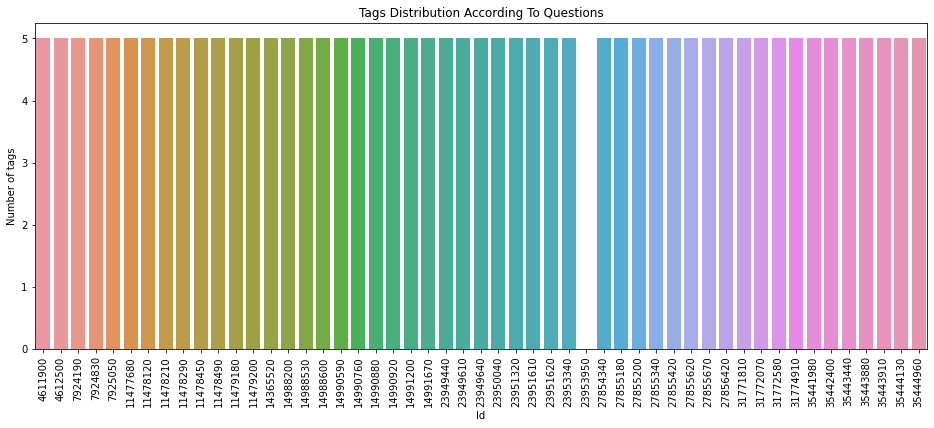

In [32]:
plt.figure(figsize=(16,6))

plt.title("Tags Distribution According To Questions")
sns.barplot(x=questions_tags.loc[:50].Id, y=questions_tags[:50].counts)

plt.xticks(rotation=90)
plt.ylabel("Number of tags")

In [33]:
for i in range(5):
    a = i+1
    df = questions_tags.loc[questions_tags['counts']==a]
    percent = (df.shape[0]/questions_tags.shape[0])*100
    print(percent, "% of questions which means: ", df.shape[0]," questions have ",a, " tags")

12.015607228955002 % of questions which means:  132480  questions have  1  tags
26.140475944297215 % of questions which means:  288216  questions have  2  tags
29.10202201047375 % of questions which means:  320869  questions have  3  tags
19.987828393039507 % of questions which means:  220379  questions have  4  tags
12.754066423234528 % of questions which means:  140622  questions have  5  tags


In [34]:
questions_ids_with_one_tag = questions_tags.loc[questions_tags['counts']==1].Id
mask_questions_one_tag = questions_data["Id"].isin(questions_ids_with_one_tag)
questions_data_one_tag = questions_data.loc[mask_questions_one_tag]
answers_data_one_tag = answers_data["ParentId"].isin(questions_ids_with_one_tag)
answers_data_one_tag = answers_data.loc[answers_data_one_tag]

In [35]:
answers_data_one_tag.shape

(249006, 6)

In [36]:
questions_data_one_tag.shape

(132480, 7)

In [37]:
questions_data_one_tag.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body'],
      dtype='object')

In [38]:
answers_data_one_tag.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body'], dtype='object')

In [39]:
qs = questions_data_one_tag.drop(['CreationDate', 'ClosedDate', 'OwnerUserId'], axis=1)

In [40]:
answ = answers_data_one_tag.drop(['CreationDate', 'OwnerUserId'],axis=1)

In [41]:
qs.to_csv('./qs')
answ.to_csv('./answ')

## 2.3. Answers data

In [42]:
answers_data.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [43]:
answers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [44]:
answers_data.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [45]:
answers = answers_data[['Id', 'ParentId', 'Score']]

In [46]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   Id        int64
 1   ParentId  int64
 2   Score     int64
dtypes: int64(3)
memory usage: 46.1 MB


In [47]:
questions_grouped_by_answers = answers.ParentId.value_counts().rename_axis('ParentId').reset_index(name='counts').sort_values(by=['counts'], ascending=False)

In [48]:
questions_grouped_by_answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102568 entries, 0 to 1102567
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   ParentId  1102568 non-null  int64
 1   counts    1102568 non-null  int64
dtypes: int64(2)
memory usage: 25.2 MB


In [49]:
questions_grouped_by_answers.describe()

,ParentId,counts
count,1.102568e+06,1.102568e+06
mean,2.022392e+07,1.827113e+00
std,1.137302e+07,1.470211e+00
min,8.000000e+01,1.000000e+00
25%,1.039486e+07,1.000000e+00
50%,2.015800e+07,1.000000e+00
75%,3.005732e+07,2.000000e+00
max,4.014319e+07,4.080000e+02


In [50]:
questions_grouped_by_answers.head(10)

,ParentId,counts
0,406760,408
1,38210,316
2,23930,129
3,100420,100
4,40480,69
5,490420,67
6,106340,61
7,2155930,59
8,226970,55
9,202750,51


Text(0, 0.5, 'Number of Answers')

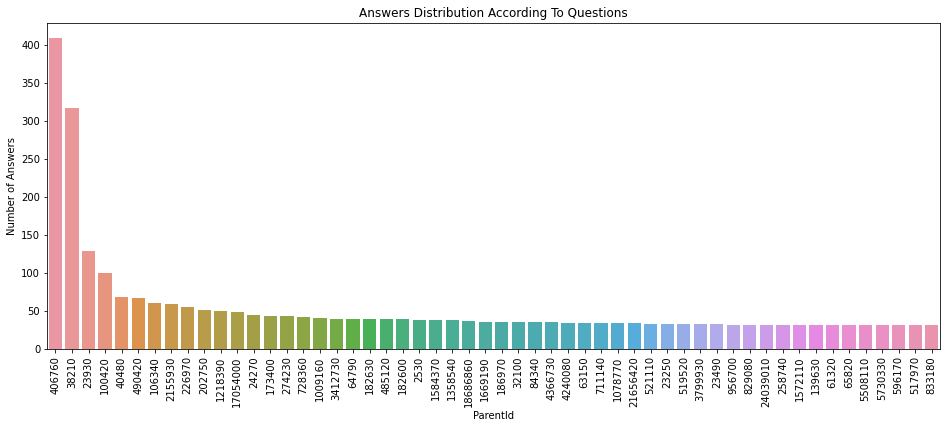

In [51]:
plt.figure(figsize=(16,6))

plt.title("Answers Distribution According To Questions")
#sns.barplot(x=questions_grouped_by_answers.loc[:50].ParentId, y=questions_grouped_by_answers[:50].counts)
sns.barplot(x='ParentId', y="counts", 
            data=questions_grouped_by_answers.loc[:50],
            order=questions_grouped_by_answers.loc[:50].sort_values('counts', ascending=False).ParentId)

plt.xticks(rotation=90)
plt.ylabel("Number of Answers")

In [52]:
questions_grouped_by_answers.loc[questions_grouped_by_answers['ParentId']==517970]

,ParentId,counts
55,517970,31


In [53]:
answers_data.loc[answers_data['ParentId']==517970].head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
28207,517992,43089.0,2009-02-05T21:22:43Z,517970,56,"<p>Well, here's a quick hack:</p>\n\n<pre><cod..."
28209,518007,2696.0,2009-02-05T21:25:08Z,517970,218,"<p>As you mentioned, you can do a system call:..."
28243,518401,10661.0,2009-02-05T23:03:55Z,517970,5,<p>Use idle. It has many handy features. <kbd...
28250,518540,21384.0,2009-02-05T23:51:51Z,517970,1,"<p>EDIT: I've just read ""windows"", this is for..."
38432,684344,47850.0,2009-03-26T02:42:42Z,517970,111,<p>here something handy that is a little more ...


In [54]:
answers.Score.describe()

count    2.014516e+06
mean     2.480563e+00
std      1.590938e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: Score, dtype: float64

In [55]:
df = answers.sort_values('Score', ascending=False)
d = df.head(50)
d.shape

(50, 3)

Text(0, 0.5, 'Number of Answers')

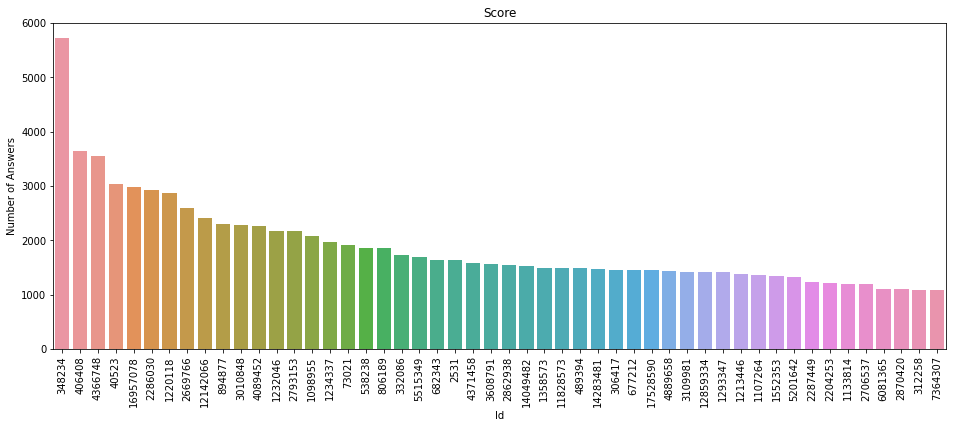

In [56]:
plt.figure(figsize=(16,6))

plt.title("Score")
sns.barplot(x='Id', y="Score", 
            data=d,
            order=d.sort_values('Score', ascending=False).Id)

plt.xticks(rotation=90)
plt.ylabel("Number of Answers")

# 3. Data cleaning

In [57]:
question = questions_data.loc[0]
question

Id                                                             80
OwnerUserId                                                  26.0
CreationDate                                 2008-08-01T13:57:07Z
ClosedDate                                                    NaN
Score                                                          26
Title           SQLStatement.execute() - multiple queries in o...
Body            <p>I've written a database generation script i...
Name: 0, dtype: object

In [58]:
def tags_in_question(question):
    df = tags_data.loc[tags_data["Id"]==question.Id]
    result = []
    for index, row in df.iterrows():
        result.append(row.Tag)
    return result

In [59]:
def question_to_tags_vector(question):
    tags_q = tags_in_question(question)
    result = pd.Series()
    for index, row in tags.iterrows():
        if row.Tag in tags_q:
            result[row.Tag]=1
        else:
            result[row.Tag]=0
    return result

In [60]:
question_to_tags_vector(question)

/tmp/ipykernel_1024636/2523397441.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result = pd.Series()


javascript        0
java              0
c#                0
php               0
android           0
                 ..
put               0
checksum          0
egit              0
iis-express       0
retina-display    0
Length: 3028, dtype: int64

# 4. Data Extraction

In [61]:
questions_data['CreationDate'].unique()

array(['2008-08-01T13:57:07Z', '2008-08-01T14:41:24Z',
       '2008-08-01T15:50:08Z', ..., '2016-10-19T23:05:49Z',
       '2016-10-19T23:08:42Z', '2016-10-19T23:36:01Z'], dtype=object)

In [62]:
train_questions = questions_data[(questions_data['CreationDate'] >= '2008-01-01')&(questions_data['CreationDate'] <= '2008-12-31')]
test_questions = questions_data[(questions_data['CreationDate'] >= '2009-01-01')&(questions_data['CreationDate'] <= '2009-12-31')]

In [63]:
print(train_questions.shape)
print(test_questions.shape)

(5789, 7)
(34279, 7)


In [64]:
def questions_year(year):
    start_date = str(year)+'-01-01'
    end_date = str(year)+'-12-31'
    data = questions_data[(questions_data['CreationDate'] >= start_date)&(questions_data['CreationDate'] <= end_date)]
    print("Dataset size from ", start_date, " to ", end_date,": ",data.shape)
    return data

In [65]:
for i in range(2008, 2017):
    a = questions_year(i)

Dataset size from  2008-01-01  to  2008-12-31 :  (5789, 7)
Dataset size from  2009-01-01  to  2009-12-31 :  (34279, 7)
Dataset size from  2010-01-01  to  2010-12-31 :  (69260, 7)
Dataset size from  2011-01-01  to  2011-12-31 :  (116522, 7)
Dataset size from  2012-01-01  to  2012-12-31 :  (155608, 7)
Dataset size from  2013-01-01  to  2013-12-31 :  (187888, 7)
Dataset size from  2014-01-01  to  2014-12-31 :  (190633, 7)
Dataset size from  2015-01-01  to  2015-12-31 :  (190608, 7)
Dataset size from  2016-01-01  to  2016-12-31 :  (150157, 7)


In [66]:
questions_2009 = questions_year(2009)
questions_2008 = questions_year(2008)

Dataset size from  2009-01-01  to  2009-12-31 :  (34279, 7)
Dataset size from  2008-01-01  to  2008-12-31 :  (5789, 7)


In [67]:
ids = questions_2008.Id.unique()
ids = ids.tolist()

In [68]:
answers_2008_mask = answers_data['ParentId'].isin(ids)
answers_2008 = answers_data.loc[answers_2008_mask]
answers_2008.shape

(30136, 6)

In [69]:
ids_2009 = questions_2009.Id.unique()
ids_2009 = ids_2009.tolist()

answers_2009_mask = answers_data['ParentId'].isin(ids_2009)
answers_2009 = answers_data.loc[answers_2009_mask]
answers_2009.shape

(112854, 6)

In [70]:
questions_2008.to_csv('./questions_2008.csv')
questions_2009.to_csv('./questions_2009.csv')

answers_2008.to_csv('./answers_2008.csv')
answers_2009.to_csv('./answers_2009.csv')